Question 1.>

Part 1

In [4]:
h=0.1
l1=[0.1]
for i in range(1,1000000):
   l1.append(l1[i-1]+h)
print(l1[-1])
print(l1[9])

100000.00000133288
0.9999999999999999


Part 2

In [5]:
h=0.1
l2=[]
for i in range(0,1000000):
    l2.append((i+1)*h)
print(l2[0],l2[-1])
print(l2[9])
print(i)

0.1 100000.0
1.0
999999


Part 3

In [6]:
er1=[]
er2=[]
for i in range(0,7):
    A=0.1*(10)**i
    for j in range(0,100000):
        if abs(l1[j]-A) < 0.001 and abs(l2[j]-A) < 0.001:
            er1.append(abs(l1[j]-A))
            er2.append(abs(l2[j]-A))
print(er1,er2)
print(i)

[0.0, 1.1102230246251565e-16, 1.9539925233402755e-14, 1.4068746168049984e-12, 1.588205122970976e-10, 1.8848368199542165e-08] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
6


Part 4 $\\$
Clearly both are not same in accuracy, the second one is more accurate. More explanation in part 6

Part 5

[0.0, 1.1102230246251565e-16, 1.9539925233402755e-14, 1.4068746168049984e-12, 1.588205122970976e-10, 1.8848368199542165e-08, 1.3328826753422618e-06] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


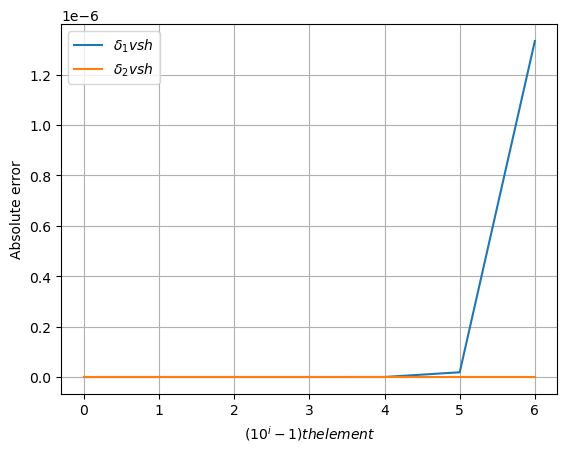

In [426]:
import matplotlib.pyplot as plt
err1=[]
err2=[]
a=[]
for i in range(0,7):
   A=0.1*(10)**i
   a.append(i)
   err1.append(abs(l1[(10**i)-1]-A))
   err2.append(abs(l2[(10**i)-1]-A))
print(err1,err2)
plt.plot(a,err1)
plt.plot(a,err2)
plt.legend([r'$\delta_1 vs h $ ',r'$\delta_2 vs h$'])
plt.xlabel(f'$(10^i-1) th element$')
plt.ylabel('Absolute error')
plt.grid()

Part 6

Their is a round off error,$\epsilon$ associated with each number in floating point representation. So during operations such as addition or multiplication errors get accumulated. $\\$
In the first code where we are iteratively adding the numbers, the error accumulated grows linearly, resulting in $N\epsilon$ total error . While, In the second code we aren't using any previous number to generate the next one each number has error of only $\epsilon$ and hence,the error in the addition starts to grow for larger values of i.

# Question 2.>

Part 1. $\\$
No, It doesn't mean that the that we will find the exact solution, instead what it implies is that the convergence for that iteration i.e $k^{th}$, is not linear but of higher order, quadratic if $g''(x^{k-1})$ is not zero. It is because to understand the scaling we only retain the leading term in the expression we get from taylor expansion. It is done below.

### Taylor Expansion of $ g(x^{(k-1)})$ About $ x^* $

The Taylor series expansion of $ g(x) $ around $ x^* $ is:
$$
g(x) = g(x^*) + g'(x^*)(x - x^*) + \frac{g''(x^*)}{2}(x - x^*)^2 + .....
$$
Since $ g(x^*) = x^* $, this simplifies to:
$$
g(x) = x^* + g'(x^*)(x - x^*) + \frac{g''(x^*)}{2}(x - x^*)^2 + .....
$$
---
###  Linear Convergence
The fixed-point iteration formula is:
$$
x^{(k)} = g(x^{(k-1)}).
$$

Subtracting  $x^* = g(x^*)$ from both sides gives:

$$
x^{(k)} - x^* = g'(x^{(k-1)})(x^{(k-1)} - x^*) + .....
$$

If \( |g'(x^*)| < 1 \), the leading term dominates, and the error propagates linearly:

$$
|x^{(k)} - x^*| \propto g'(x^{(k-1)})|x^{(k-1)} - x^*|.
$$
This is **linear convergence**.

---

Part 2 . Since the derivative is zero the next leading term is quadratic.

###  Quadratic Convergence ($ g'(x^{(k-1)}) = 0 $)

If $ g'(x^{(k-1)}) = 0 $, the linear term vanishes, and the quadratic term dominates. Substituting the Taylor expansion:

$$
x^{(k)} - x^* \approx \frac{g''(x^*)}{2}(x^{(k-1)} - x^*)^2.
$$

Thus, the error satisfies:

$$
|x^{(k)} - x^*| \propto |x^{(k-1)} - x^*|^2.
$$

This indicates **quadratic convergence**.


# Question 3

Part 1

In [8]:
import numpy as np
def func(x):
    return x**4 -10*x**3 + 35*x**2 -50*x +24
func(5)

24

Part 2

Text(0.5, 1.0, '$f(x) vs x$')

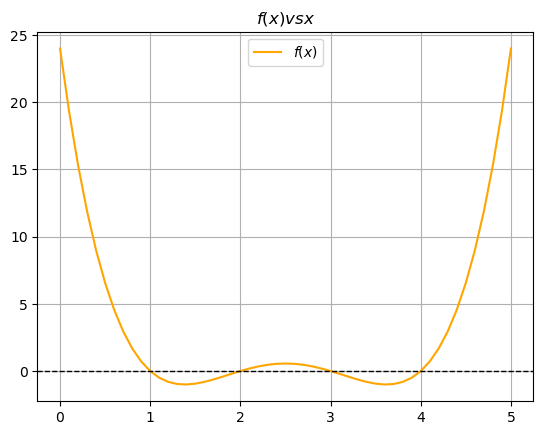

In [428]:
xs=[0.1*i for i in range(0,51)]
y=[func(xs[i]) for i in range(0,51)]
plt.plot(xs,y,color='orange')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid()
plt.legend(['$f(x)$'])
plt.title(r'$f(x) vs x$')

Part 3

In [13]:
def central_deriv(f, x, h):
 cd = (f(x+h/2)-f(x-h/2))/h
 return cd
def richardson(f, derivf, x, h, p, q):
 c = 2**p
 ri = (c*derivf(f,x,h/2) - derivf(f,x,h))/(c-1)
 return ri

Part 4

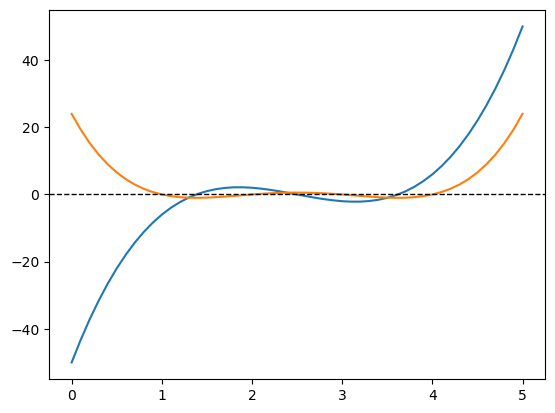

In [372]:
h=xs[2]-xs[1]
p=q=2
fprime=[richardson(func,central_deriv,x,h,p,q) for x in xs]
plt.plot(xs,fprime)
plt.plot(xs,y)
plt.axhline(0, color='black', linewidth=1, linestyle='--')

[7.105427357601002e-14, 1.6579330501069005e-12, 3.789561257387201e-11, 1.8947806286936006e-10, 3.3158661002138e-09, 4.026408835973901e-08, 1.6579330501069003e-07, 3.552713678800501e-06, 3.789561257387201e-05, 0.0007579122514774402, 0.003789561257387201, 0.004736951571734001, 0.3789561257387201]


Text(0, 0.5, 'Abs error')

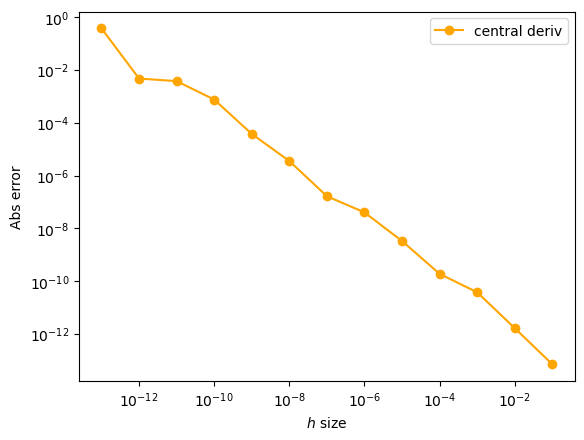

In [378]:
def anaderiv(x):
    return 4*x**3 -30*x**2 +70*x -50
hs = [10**(-i) for i in range(1,14)]
z=[abs(richardson(func,central_deriv,2.5,h,p,q)-anaderiv(2.5)) for h in hs]
print(z)
q=[i for i in range(1,14)]
plt.plot(hs,z,ls='solid', color='orange', marker='o', label='central deriv')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('$h$ size')
plt.ylabel('Abs error')

The value of $h$ for which the error is minimum is $h=0.1$

Part 5

In [400]:
def bisection(f, x0, x1, k=300, tol=1.e-8):
   f0=f(x0)
   f1=f(x1)
   if f0*f1>0:
     xr= None
     print("bad choice")
     return
   elif np.abs(f0*f1)==0:
     if f0<tol:
       xr=x0
     else:
       xr=x1
     return xr
   else:
     for i in range(1,k):
       x2=(x0+x1)/2
       f2=f(x2)
       if f0*f2<0:
         x1=x2
       else:
         x0=x2
         f0=f2
       xr=(x0+x1)/2
       if np.abs((xr-x2)/xr)<tol:
         break
       else:
        xr=None
   return xr,i

    
bisection(func,0.6,1.5)    


(0.9999999962747097, 26)

In [401]:
roots=[]
for i in range(0,4):
  roots.append(bisection(func,i+0.7,i+1.4))
roots

[(0.9999999977648256, 26),
 (1.999999992549419, 25),
 (3.0000000029802316, 24),
 (4.000000002980233, 24)]

The roots are $x_0=1,2,3,4$

Part 6

Simplest way to check stability of the roots is to evaluate their derivatives and compare them. Smaller the derivative larger will be the change due to simple perturbation in f(x).
i.e $stability \propto 1/|f'(x_0)|$

In [429]:
g=[]
print('derivatives at the roots are :')
for k in  range(4):
  g.append(central_deriv(func,k+1,h=1e-6))
g

derivatives at the roots are :


[-6.000000000838668,
 1.9999999949504854,
 -1.9999999949504854,
 6.000000013273166]

Since the derivatives at 2 and 3 are smaller than 1 and 4 they are more unstable, Hence the order of stability is-  $stability(x_0)\rightarrow 1=4>2=3$

I thought of other ways to check the stability Namely (a) to change the initial guess and check which one is more stable, but i don't think that idea should be used here.
(b) changing the parameters in the Given f(x), this seems an interesting way to check stability but i guess as sir has mentioned in the last problem we have to check the stability w.r.t a vertical shift perturbation in f(x).

The below code is not part of the question, just some additional ideas.

In [24]:
def root_stability(f, a, b, pert=0.3):
    root = bisection(f, a, b)[0]
    pert_a=a+pert
    pert_b = b - pert
    pert_root = bisection(f, pert_a, pert_b)[0]
    sensitivity = abs(root - pert_root)  # Change in root due to perturbation
    convergence= (b - a) / (2 ** (bisection(f, pert_a, pert_b)[1])) 
    
    return root, sensitivity,convergence
for i in range(0,4):
  print(root_stability(func,i+0.6,i+1.5))

(0.9999999999999993, 1.1102230246251565e-16, 6.394884621840902e-15)
(2.0000000000000098, 8.881784197001252e-16, 6.394884621840901e-15)
(3.000000000000112, 8.570921750106208e-14, 1.2789769243681802e-14)
(4.00000000000011, 1.0658141036401503e-13, 1.2789769243681802e-14)


[(1.0159141384898582, 49),
 (1.8650076445214137, 48),
 (3.367198239537459, 47),
 (3.761879977451305, 47)]

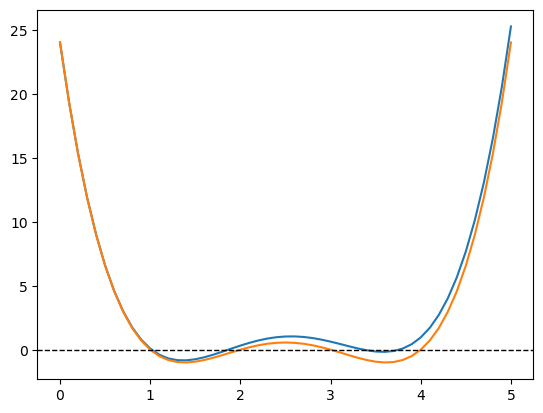

In [54]:
def func2(x,a=0.01,b=0.1):
    a= x**4 -(10+a)*x**3 + (35+b)*x**2 -(50)*x +24
    return a
plt.plot(xs,[func2(x) for x in xs])
plt.plot(xs,[func(x) for x in xs])
plt.axhline(0, color='black', linewidth=1, linestyle='--')
rootsp=[]
for i in range(0,4):
  rootsp.append(bisection(func2,i+0.5,i+1.4))
rootsp   

Part 7 (a)

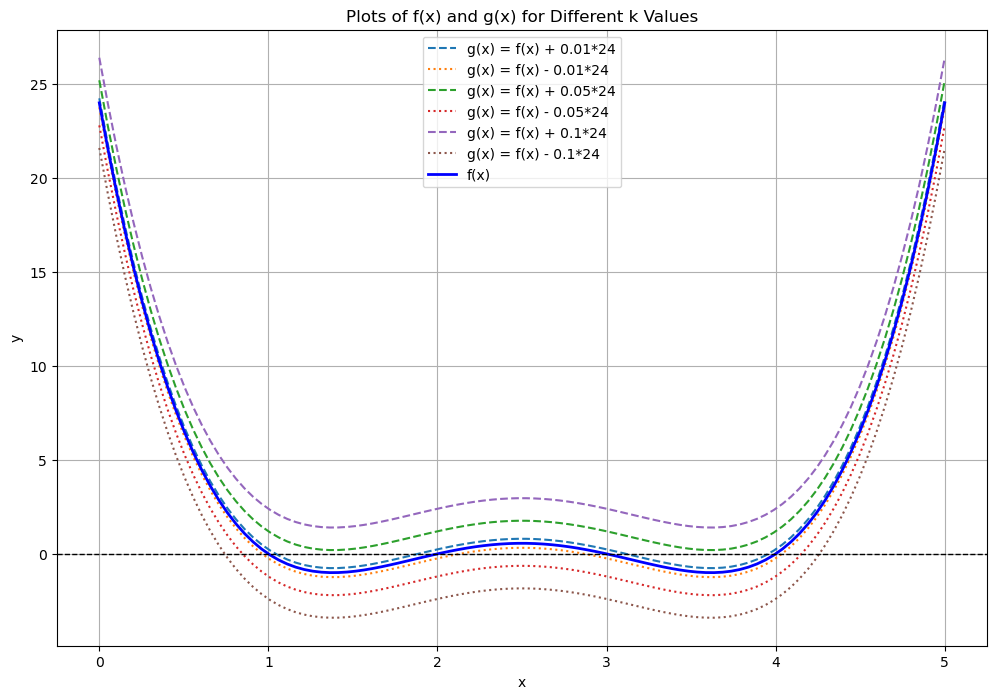

In [404]:
x = np.linspace(0, 5, 100)
k_values = [0.01, 0.05, 0.1]
plt.figure(figsize=(12, 8))
for k in k_values:
    plt.plot(x, g(x, k, 1), label=f"g(x) = f(x) + {k}*24", linestyle='--')
    plt.plot(x, g(x, k, -1), label=f"g(x) = f(x) - {k}*24", linestyle=':')
plt.plot(x, func(x), label="f(x)", color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Plots of f(x) and g(x) for Different k Values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



7.(b)
$g(x) = f(x) \pm k*24$   
    1.    For $k=0.01$ it crosses 4 times.    
    2.    For $k=-0.01$ it crosses 4 times.  
    3.    For $k=0.05$ it crosses 0 times.
    4.    For $k=-0.05$ it crosses 2 times   
    5.    For $k=0.1$ it crosses 0 times.
    6.    For $k=-0.1$ it crosses 2 times.

7.(c) From our analysis we got that the inner two roots i.e $x_0-2,3$ are more unstable, here we can observe it as they disappear for perturbation of negative k as well as postive one. $x=1$ and $4$ disappears in 2 out of the 6 perturbations, while roots at $x=2,3$ disappears for 4 out of 6 cases.

7.(d) Even thought both f(x) and g(x) are 4th ordered polynomials they differe in the number of roots, as when we modify f(x) to g(x) depending on k it has few complex roots as well.

# Question 4

Part 1
$$
f(x) = \frac{(x-5)(x-6)\sqrt{x}}{x-7} + \ln(8x).
$$
We do it by automatic differentiation.
The different intermediate variables are converted to ordered pairs
1. $( u_1 = x - 5 )$: $ (u_1, u_1') = (x - 5, 1).$
2. $ ( u_2 = x - 6 )$:$ (u_2, u_2') = (x - 6, 1).$
3. $(u_3 = \sqrt{x})$:$ (u_3, u_3') = \left(\sqrt{x}, \frac{1}{2\sqrt{x}}\right).$
4. $( v_1 = u_1 u_2 u_3)$:$(v_1, v_1') = \left(u_1 u_2 u_3, u_2 u_3 u_1' + u_1 u_3 u_2' + u_1 u_2 u_3'\right).$
5. $( u_4 = x - 7 )$:$ (u_4, u_4') = (x - 7, 1).$
6. $( v_2 = \frac{v_1}{u_4})$: $ (v_2, v_2')= \left(\frac{v_1}{u_4}, \frac{v_1' u_4 - v_1 u_4'}{u_4^2}\right).$
7. $ (v_3 = \ln(8x))$:$(v_3, v_3') = \left(\ln(8x), \frac{1}{x}\right).$
8. $(f(x) = v_2 + v_3)$:$(f, f') = (v_2 + v_3, v_2' + v_3').$
Now we compute the derivative of $f(x)$
1. Compute  the product of the three variables in the numerator $(v_1')$:$v_1' = u_2 u_3 + u_1 u_3 + u_1 u_2 \cdot \frac{1}{2\sqrt{x}}.$
2. Compute $(v_2'):$v_2' = \frac{v_1' u_4 - v_1 u_4'}{u_4^2}.$
3. Compute $(v_3')$:$v_3' = \frac{u_5'}{u_5} = \frac{8}{8x} = \frac{1}{x}.$
4. Combine to get $(f'(x))$:$f'(x) = v_2' + v_3' = \frac{\left(u_2 u_3 + u_1 u_3 + u_1 u_2 \cdot \frac{1}{2\sqrt{x}}\right) u_4 - u_1 u_2 u_3}{(x-7)^2} + \frac{1}{x}.$

Part 2

Now we Evaluate $f(4)$ and $f'(4)$

1. Compute intermediate values at $x = 4$:
   $$
   \begin{aligned}
   u_1 &= 4 - 5 = -1, & u_1' &= 1, \\\\
   u_2 &= 4 - 6 = -2, & u_2' &= 1, \\\\
   u_3 &= \sqrt{4} = 2, & u_3' &= \frac{1}{2\sqrt{4}} = \frac{1}{4}, \\\\
   u_4 &= 4 - 7 = -3, & u_4' &= 1, \\\\
   u_5 &= 8 \cdot 4 = 32, & u_5' &= 8.\\\\
   v_1 &= u_1 u_2 u_3 = (-1)(-2)(2) = 4, \\\\
   v_1' &= u_2 u_3 + u_1 u_3 + u_1 u_2 \cdot \frac{1}{2\sqrt{x}} \\\\
   &= (-2)(2) + (-1)(2) + (-1)(-2) \cdot \frac{1}{4} \\\\
   &= -4 - 2 + \frac{1}{2} = -6 + \frac{1}{2} = -\frac{11}{2}.
   \end{aligned}
   $$
   $$
   \begin{aligned}
   v_2 &= \frac{v_1}{u_4} = \frac{4}{-3} = -\frac{4}{3}, \\\\
   v_2' &= \frac{\left(-\frac{11}{2}\right)(-3) - (4)(1)}{(-3)^2} \\\\
   &= \frac{\frac{33}{2} - 4}{9} = \frac{\frac{25}{2}}{9} = \frac{25}{18}.
   \end{aligned}
   $$
5. Combine results:
   $$
   \begin{aligned}
   f(4) &= v_2 + v_3 = -\frac{4}{3} + \ln(32), \\\\
   f'(4) &= v_2' + v_3' = \frac{25}{18} + \frac{1}{4}.
   \end{aligned}
   $$
   $$
   f'(4) = \frac{100}{72} + \frac{18}{72} = \frac{118}{72} = \frac{59}{36}.
   $$

## Final Results

$$
f(4) = -\frac{4}{3} + \ln(32), \quad f'(4) = \frac{59}{36}.
$$


part 3

In [304]:
import sympy as sp
x = sp.symbols('x')
f = ((x - 5) * (x - 6) * sp.sqrt(x)) / (x - 7) + sp.ln(8 * x)
df_dx= sp.diff(f, x)
f_4 = f.subs(x, 4)
df_dx4 = df_dx.subs(x, 4)
f, df_dx, f_4, df_dx4


(sqrt(x)*(x - 6)*(x - 5)/(x - 7) + log(8*x),
 sqrt(x)*(x - 6)/(x - 7) + sqrt(x)*(x - 5)/(x - 7) - sqrt(x)*(x - 6)*(x - 5)/(x - 7)**2 + 1/x + (x - 6)*(x - 5)/(2*sqrt(x)*(x - 7)),
 -4/3 + log(32),
 59/36)

# Question 5

Part 1

Expected value of it is 1 which can be seen by following calculation.
$$
\begin{aligned}
f(x) &= \frac{1-\cos(x)}{x^2} \\
Now,\ 1-\cos(x)&=2\sin^2(x/2) \implies f(x)=\frac{2\sin^2(x/2)}{2x^2/2}=\frac{\sin^2(x/2)}{2\times(x/2)^2}\\
\end{aligned}
$$
Taking the limit as $x\rightarrow 0$ 
$$
\begin{aligned}
f(0)=lim_{x\rightarrow 0}\frac{\sin^2(x/2)}{2\times(x/2)^2}=\frac{1}{2}
\end{aligned}
$$

Part 2

In [430]:
def fun(x):
     return (1- np.cos(x))/(x**2)

In [104]:
fun(0.0001)

0.4999999969612645

Part 3

We can modify $f(x)$ as following to avoid any catastrophic cancellation :
$$
\begin{aligned}
f(x)=\frac{2\sin^2(x/2)}{x^2}
\end{aligned}
$$


Part 4

In [431]:
def g(x,tol=1e-8):
           return 2*(np.sin(x/2))**2/(x**2)
    


Part 5

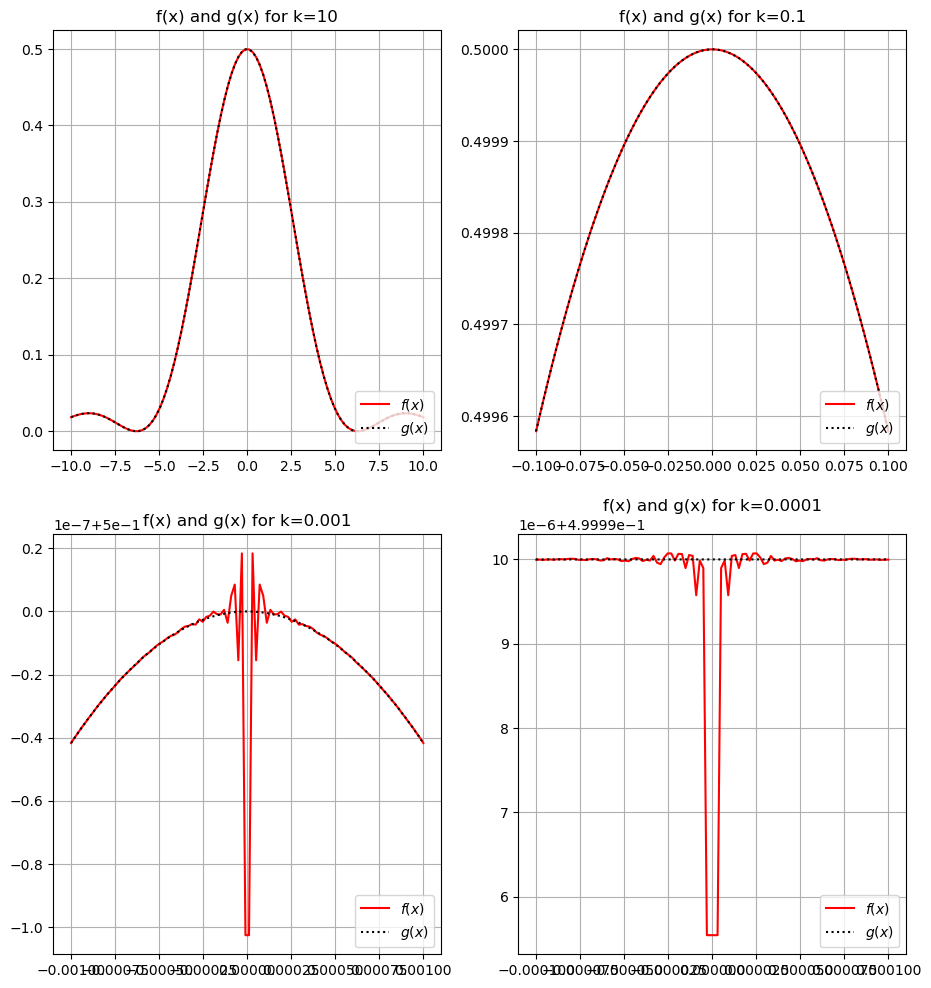

In [437]:
ks=[10,0.1,1e-3,1e-4]
plt.figure(figsize=(11, 12)) 
for i in range(0,4):
 k=ks[i]
 xs=np.linspace(-k,k,100)
 plt.subplot(2,2,i+1)
 plt.plot(xs,[fun(x) for x in xs],color='red')
 plt.plot(xs,[g(x) for x in xs],linestyle=':',color='black')
 plt.legend(["$f(x)$", "$g(x)$"], loc="lower right")
 plt.grid()
 plt.title(f"f(x) and g(x) for k={k}")


Part 6

Clearly the function $f(x)$ starts to fluctuate near x=0, which happens due to the catastrophic cancellation,  while the modified function $g(x)$ behaves smoothly,so it is better.

Part 7

In [415]:
g(0)

/var/folders/sl/4ds1pgsx66x8n77_qhc4rn_r0000gn/T/ipykernel_8571/739408925.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return 2*(np.sin(x/2))**2/(x**2)


nan

we are getting result nan, we can modify it to take the limiting value at x==0 i.e. 1/2.

Part 8

In [418]:
def g1(x,tol=1e-8):
      if x==0:
            return 1/2
      else:
           return 2*(np.sin(x/2))**2/(x**2)
      
g1(0)

0.5

This is the modified $g(x)$ which wouldn't give Nan result

# Question 6

Part 1, 2 ,3

In [438]:
def f1(x):
    return np.exp(-x**2)
def analytic_f1(x):
    return  -2*x*(np.exp(-x**2))
def cdf1(x,h):
    return central_deriv(f1,x,h)
   


Part 4

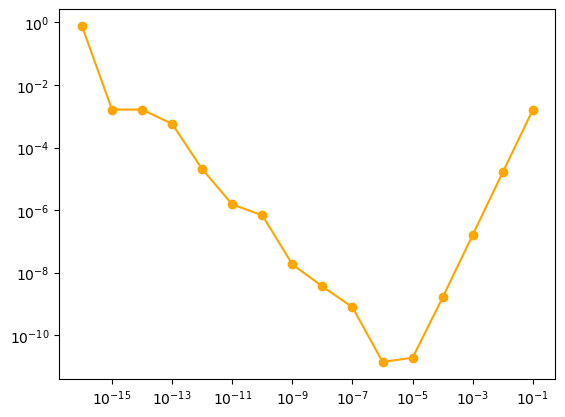

In [323]:
hs = [10**(-i) for i in range(1,17)]
cds = [cdf1(0.5,h) for h in hs]

err=np.abs(np.array(cds)-analytic_f1(0.5))
plt.plot(hs,err, ls='solid', color='orange', marker='o', label='central deriv')
plt.xscale('log')
plt.yscale('log')

The plot shows that the optimal h to choose is either $h=10^{-6}$ or $h=10^{-5}$, changing x values one of them which is lower.

Part 5. (a) and (b) $\\$
Here we define a function which evaluates the angle between the tangent, normal and the x axis .

In [207]:
import math
def angle(f,x):
    at=math.atan(f(x))*(180/np.pi)
    an=math.atan(f(x))*(180/np.pi)+90
    return at,an

In [439]:
angle(analytic_f1,-0.6) #In degrees

(39.93646025090487, 129.93646025090487)

Part 6,7,8

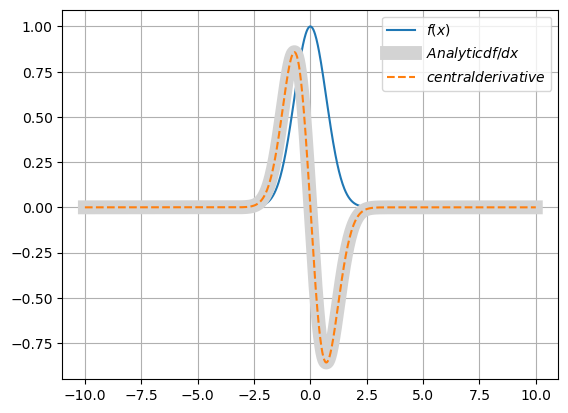

In [440]:
x1=np.linspace(-10,10,1000)
plt.plot(x1,[f1(x) for x in x1])
plt.plot(x1,[analytic_f1(x) for x in x1],lw=10,color='lightgrey')
plt.plot(x1,[central_deriv(f1,x,1e-6) for x in x1],linestyle='--')
plt.legend(['$f(x)$','$Analytic df/dx$','$central derivative$'])
plt.grid()

Both of them match quite well.

Part 9 and 10 I have plotted both of them.

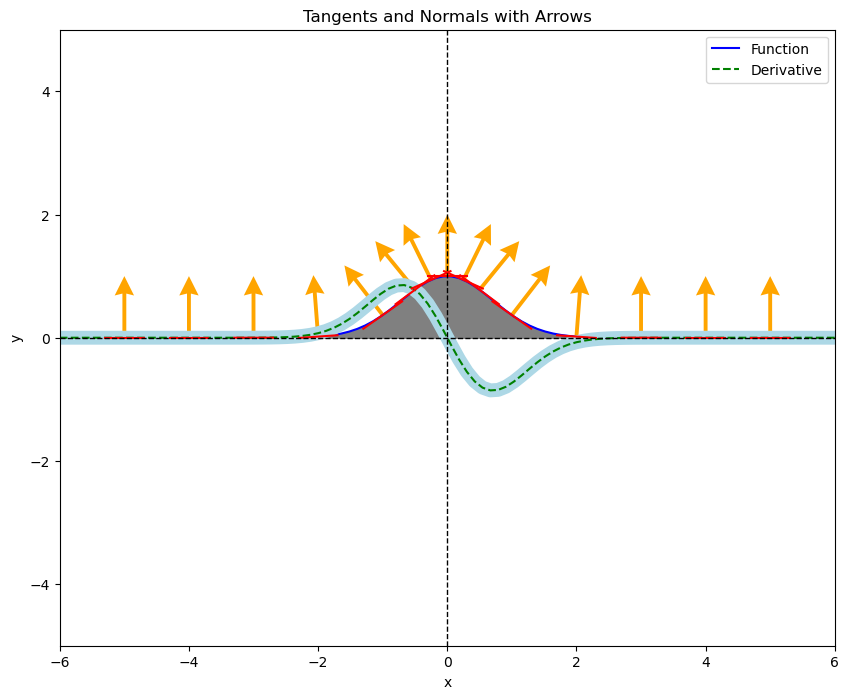

In [443]:
x_points = [-5, -4, -3, -2, -1, -0.5, -0.25,0, 0.25, 0.5, 1, 2, 3, 4, 5]
x1 = np.linspace(-6, 6, 100)
plt.figure(figsize=(10, 8))
plt.plot(x1, [f1(x) for x in x1], label='Function', color='blue')
plt.fill_between(x1,[f1(x) for x in x1],0,color='grey')
plt.plot(x1,[analytic_f1(x) for x in x1],lw=10,color='lightblue')
plt.plot(x1, [central_deriv(f1, x, 1e-6) for x in x1], linestyle='--', label='Derivative', color='green')
for xi in x_points:
    tangentline_x = np.linspace(xi - 0.3, xi + 0.3, 10)
    slope = central_deriv(f1, xi, 1e-6)
    tangent_line_y = f1(xi) + slope * (tangentline_x - xi)
    plt.plot(tangentline_x, tangent_line_y, linestyle='-', color='red')
    normalslope = -1 / slope if slope != 0 else 1000
    dx = -1 / np.sqrt(1 + normalslope**2) if xi<0 else (1 / np.sqrt(1 + normalslope**2))
    dy = normalslope * dx 
    plt.quiver( xi, f1(xi), dx, dy, angles='xy', scale_units='xy',scale=1,color='orange', width=0.005, headwidth=5)

plt.xlim([-6, 6])
plt.ylim([-5, 5])
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title("Tangents and Normals with Arrows")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

